In [77]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import itertools
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.cluster import KMeans, DBSCAN
%run fm_index.ipynb
%run hopkins.ipynb

In [32]:
# Load experimental data
path_to_json = '../stimuli/clustering_data/' 
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

data = pd.DataFrame(columns=['base_uuid', 'clusters', 'participant', 'unique_uuid', 'group'])

# we need both the json and an index number so use enumerate()
index = 0
for _, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_data = json.load(json_file)
        for sample in json_data:
            if sample["flipped"]:
                print(sample["clusters"])
                unflipped = []
                for cluster in sample["clusters"]:
                    unflipped.append(list(map(lambda p: {"x": 800 - p["x"], "y": 500 - p["y"]}, cluster)))
                sample["clusters"] = unflipped
                print(sample["clusters"])
            data.loc[index] = np.array((sample["base_uuid"], sample["clusters"], sample["participant_id"], sample['unique_uuid'], sample['group']))
            index += 1
            # print(sample["clusters"])
            # for cluster in sample["clusters"]:
            #     plt.scatter(list(p["x"] for p in cluster), list(p["y"] for p in cluster))
        # # here you need to know the layout of your json and each json has to have
        # # the same structure (obviously not the structure I have here)


9}, {'x': 550, 'y': 273}, {'x': 315, 'y': 208}, {'x': 248, 'y': 331}, {'x': 399, 'y': 384}, {'x': 646, 'y': 78}], [{'x': 248, 'y': 331}, {'x': 91, 'y': 129}, {'x': 237, 'y': 164}], [{'x': 64, 'y': 420}, {'x': 369, 'y': 424}]]
[[{'x': 34, 'y': 112}, {'x': 89, 'y': 31}, {'x': 75, 'y': 62}, {'x': 50, 'y': 71}], [{'x': 351, 'y': 90}, {'x': 370, 'y': 102}], [{'x': 599, 'y': 144}, {'x': 522, 'y': 176}, {'x': 536, 'y': 146}], [{'x': 648, 'y': 315}, {'x': 671, 'y': 274}], [{'x': 770, 'y': 289}, {'x': 782, 'y': 284}], [{'x': 763, 'y': 408}, {'x': 742, 'y': 428}], [{'x': 285, 'y': 378}, {'x': 251, 'y': 395}], [{'x': 72, 'y': 462}, {'x': 27, 'y': 449}], [{'x': 128, 'y': 192}, {'x': 110, 'y': 218}], [{'x': 330, 'y': 213}, {'x': 163, 'y': 129}, {'x': 489, 'y': 262}], [{'x': 330, 'y': 213}, {'x': 163, 'y': 129}, {'x': 321, 'y': 20}], [{'x': 486, 'y': 21}], [{'x': 753, 'y': 204}, {'x': 575, 'y': 248}], [{'x': 292, 'y': 483}, {'x': 153, 'y': 443}]]
[[{'x': 766, 'y': 388}, {'x': 711, 'y': 469}, {'x': 7

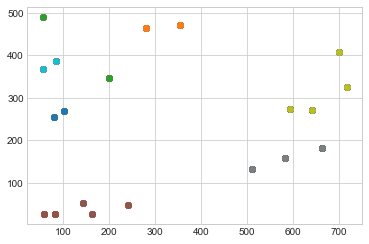

In [34]:
for row in data.loc[data['base_uuid'] == "37ecaaa0-dbb1-4b98-ad55-ce73229d5866"].iterrows():
    clusters = row[1][1]
    for cluster in clusters:
        plt.scatter(list(p["x"] for p in cluster), list(p["y"] for p in cluster))




In [74]:
k_means_df = pd.DataFrame(columns=["base_uuid", "clusters"])

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# Run K-Means on each stimulus
index = 0
stimuli = data.drop_duplicates(subset=['base_uuid'])
for row in stimuli.iterrows():
    clusters = row[1][1]
    points = []
    for cluster in clusters:
        for p in cluster:
            points.append([p["x"], p["y"]])
    clustered = KMeans(len(clusters)).fit(points)
    k_means_df.loc[index] = np.array((row[1][0], np.array(clustered.labels_, dtype="object")))
    index += 1



In [78]:
# Run DBScan on each stimulus
db_scan_df = pd.DataFrame(columns=["base_uuid", "clusters"])

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# Run DBScan on each stimulus
index = 0
stimuli = data.drop_duplicates(subset=['base_uuid'])
for row in stimuli.iterrows():
    clusters = row[1][1]
    points = []
    for cluster in clusters:
        for p in cluster:
            points.append([p["x"], p["y"]])
    clustered = DBSCAN(len(clusters)).fit(points)
    db_scan_df.loc[index] = np.array((row[1][0], np.array(clustered.labels_, dtype="object")))
    index += 1



In [ ]:
# Run Hierarchal DBScan on each stimulus

In [36]:
fm_data = pd.DataFrame(columns=["base_uuid", "fm_score", "group"])
fm_data['fm_score'] = fm_data['fm_score'].astype(float)

uuids = data[["base_uuid"]]
index = 0
for index, uuid in uuids.iterrows():
    uuid = uuid["base_uuid"]
    # print(uuid)
    filtered_data = data.loc[data["base_uuid"] == uuid]
    # if len(filtered_data) > 0:
    #     points = np.array(np.concatenate(filtered_data.iloc[0]["clusters"]).flat)
    #     print(points)
    #     hopkins_statistic = hopkins(points)
    # print(filtered_data)
    cc = list(itertools.combinations(set(filtered_data["unique_uuid"]), 2))
    for pair in cc:
        # print(pair)
        cluster1 = list(data.loc[data["unique_uuid"] == pair[0]]["clusters"])[0]
        cluster2 = list(data.loc[data["unique_uuid"] == pair[1]]["clusters"])[0]

        fm_data.loc[index] = np.array((uuid, float(fm_index_points(cluster1, cluster2)), filtered_data.iloc[0]["group"]))
        index += 1

    # for sample in data.loc[data['base_uuid'] == uuid].iterrows():
        # print(row)

# avg over pairs of clusterings in base_uuid's samples

# cc = list(itertools.combinations(uuids, 2))
# print(cc)
# pd.DataFrame([data.loc[c,:].sum() for c in cc], index=cc)
fm_data['fm_score'] = pd.to_numeric(fm_data['fm_score'])


fm_data.head()


,base_uuid,fm_score,group
0,d26cc3de-4659-421d-a01c-1b05a01a5457,0.868966,disperse
1,2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6,0.517648,clustered
2,b3697dbc-04ee-4762-a98d-5773cf0c7e84,0.690066,clustered
3,8977f47a-e877-4e8c-aec8-0408550d3baf,0.435261,disperse
4,3c4d6c38-877b-41d2-b2b5-d2f74ef0970b,0.708010,clustered


In [37]:

summary = fm_data.groupby(['base_uuid', 'group']).agg({ 'fm_score': ['count', 'mean', 'std', 'median']})
print(summary)


                                               fm_score                 \
                                                  count      mean  std   
base_uuid                            group                               
0f18f0ad-f23d-4fc9-a761-3920c107550b clustered       94  0.673331  0.0   
0f9a9c80-cdab-4071-8d56-27965b585a10 disperse        94  0.687682  0.0   
2bb1495b-1ef6-4943-bb48-662371f50b30 clustered       94  0.605530  0.0   
2f24428f-632d-4374-b0ca-cb3d0ae04bc5 disperse        94  0.690066  0.0   
2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6 clustered       94  0.517648  0.0   
3088609a-8abd-42eb-9289-926728077ed5 disperse        94  0.617213  0.0   
339f68e4-98bf-4d4a-81c7-06fa958f307e clustered       94  1.000000  0.0   
37ce66b3-c54a-46ec-981d-96c33e8fba81 disperse        94  0.626835  0.0   
37ecaaa0-dbb1-4b98-ad55-ce73229d5866 clustered       93  1.000000  0.0   
3808a1ab-27ce-451f-bbd1-525f0e658c07 clustered       94  0.457749  0.0   
3c4d6c38-877b-41d2-b2b5-d2f74ef0970b c

In [42]:
# plot mean across all of them
plt.bar(list(p[1] for p in summary))


TypeError: bar() missing 1 required positional argument: 'height'